# Test 1

Jonathan Zluticky

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

insurance = pd.read_csv("insurance.csv")

# Data Description

**Rows**

-   Each row represents and individual that has filed a health insurance claim

**Columns**

-   age: age of primary beneficiary

-   sex: insurance contractor gender, female, male

-   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,\
    objective index of body weight (kg / m \^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

-   children: Number of children covered by health insurance / Number of dependents

-   smoker: Whether or not the individual was a smoker

-   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

-   charges: Individual medical costs billed to health insurer in USD.

For this data set, the relationship between an individuals region, whether or not they smoked, their BMI and the amount of charges will be examined

# EDA

## 1.) Distribution of Variables

In [17]:
# Changing characters to factors and removing unnessisary columns.

insurance = insurance.filter(['age','sex', 'bmi', 'smoker', 'region', 'charges'])

cols = insurance.select_dtypes('object').columns

insurance[cols] = insurance[cols].astype('category')

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      1338 non-null   int64   
 1   sex      1338 non-null   category
 2   bmi      1338 non-null   float64 
 3   smoker   1338 non-null   category
 4   region   1338 non-null   category
 5   charges  1338 non-null   float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 35.8 KB


### a.)Variation of the BMI

#### i.) Distribution of BMI

In [19]:
#Numerical summary of BMI
insurance['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

The mean and median BMI of this data are very similar, 30.66 and 30.4 respectively. Meaning the average person would be classified as class 1 obese. The minimum value is 15.96 which would classify as severely underweight and the maximum value is 53.13 which would classify as class 3 obesity. The value 53.13 seems very high and will be investigated later. The standard deviation of the data set is 6.1 meaning the majority of the BMI's are between 24.6 and 36.7.

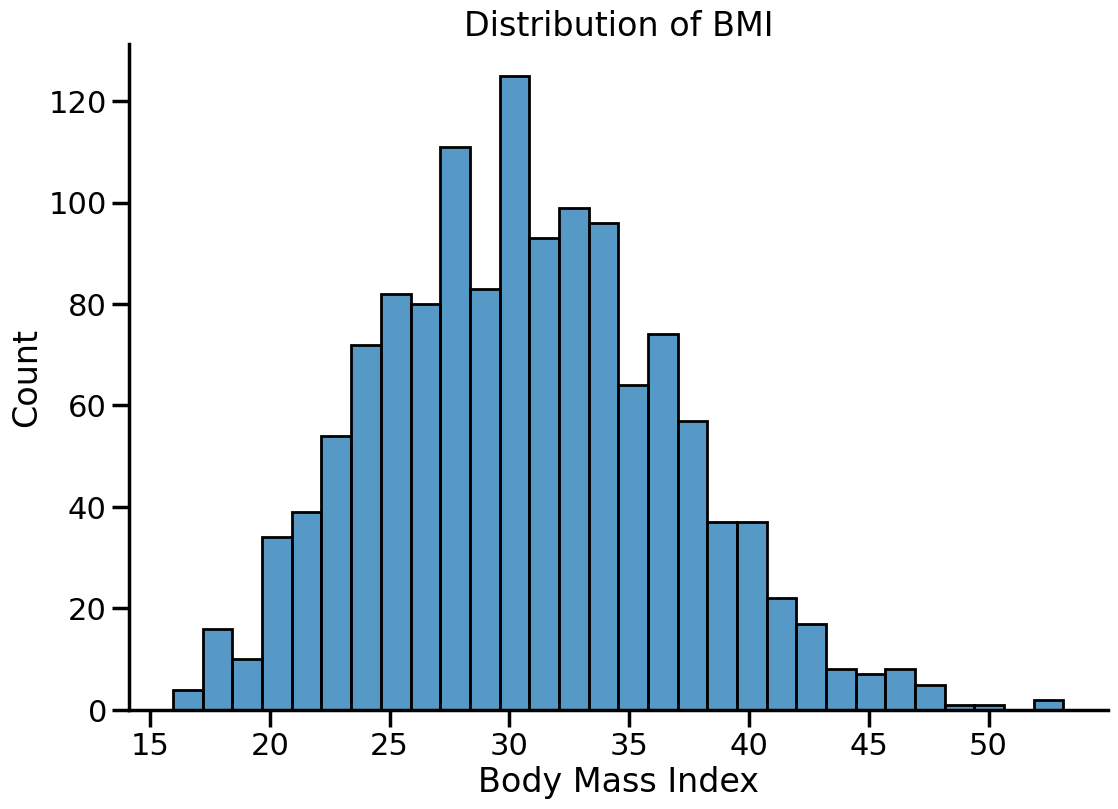

In [29]:
# Histogram of BMI
sns.set_context("poster")
fig = sns.displot(x = 'bmi',  data = insurance, kind="hist", bins = 30, height=8.27, aspect=11.7/8.27)
fig.set(xlabel = "Body Mass Index", title = "Distribution of BMI")
plt.show()

The distribution of BMI is approximately symmetric with the majority of data occurring around 30. There are are a couple spikes of BMI less than 30 and a dip in values around 35. There are also appear to be a couple of individuals with really high BMI of around 55.

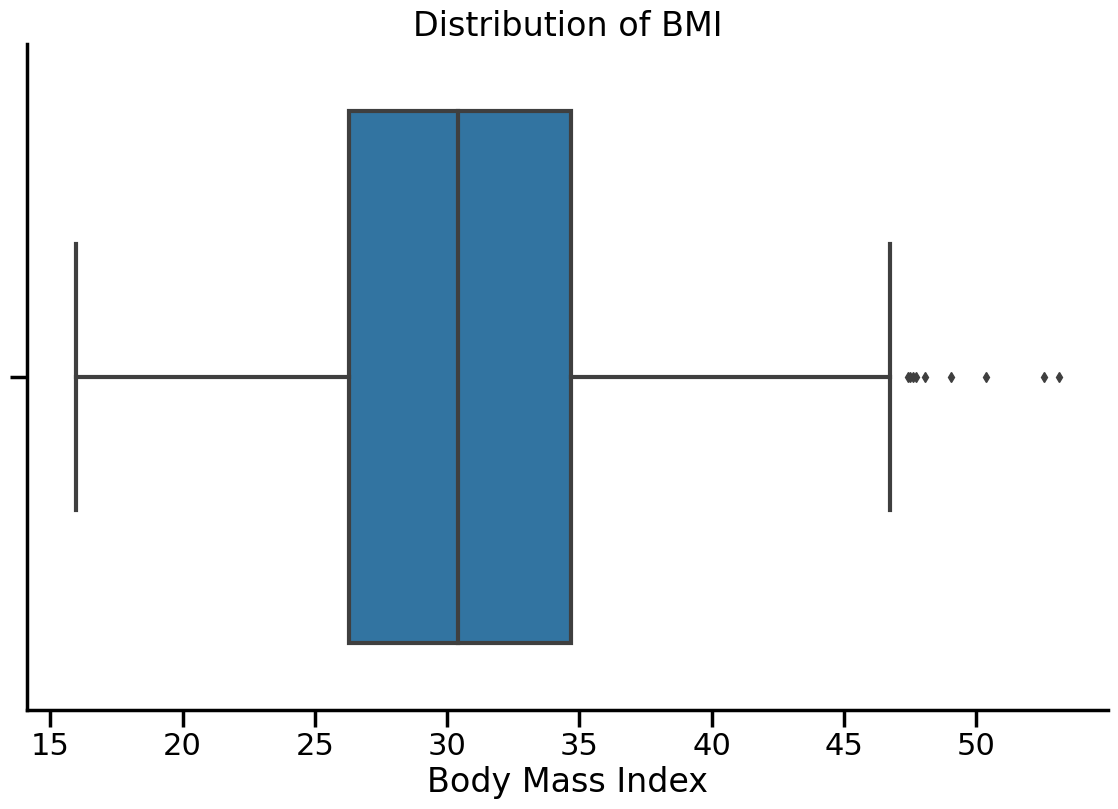

In [31]:
#Boxplot of BMI

fig = sns.catplot(x = "bmi", data = insurance, kind = "box", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

fig.set(xlabel = "Body Mass Index", title= "Distribution of BMI")

plt.show()

The box plot is approximately symmetric with a median value just over 30.This plot shows that there are several outliers. These will be investigated to determine whether or not they need to be removed.

#### ii.) Checking for outliers


In [34]:
# Investigating individuals with highest BMI
insurance.filter(['age','sex','bmi','smoker']).\
    sort_values(by = 'bmi', ascending = False).\
    head(10)

,age,sex,bmi,smoker
1317,18,male,53.13,no
1047,22,male,52.58,yes
847,23,male,50.38,no
116,58,male,49.06,no
286,46,female,48.07,no
1088,52,male,47.74,no
860,37,female,47.60,yes
401,47,male,47.52,no
543,54,female,47.41,yes
438,52,female,46.75,no


The top 4 highest BMIs belong to males. Assuming the average height for a man is 5'10, the average weight of these individuals would be around 370 pound. Although this is high it is not unreasonable. These values still provides useful information and should not be removed.

#### iii.) Creating Classes of BMI

Classifying people based off of BMI as underweight, healthy, overweight, etc. could be quite useful.


In [47]:
def func(bmi):
    if bmi<=16:
        bmi_cat = 'Serverly Under Weight'
    elif bmi>16 and bmi<=18.5: 
        bmi_cat = 'Under Weight'
    elif bmi>18.5 and bmi<=25:
        bmi_cat = 'Healthy Weight'
    elif bmi> 25 and bmi <= 30: 
        bmi_cat = 'Over Weight'
    elif bmi> 30 and bmi <= 35:
        bmi_cat = 'Obese class 1'
    elif bmi> 35 and bmi <= 40:
        bmi_cat ='Obese class 2'
    elif bmi>40:
        bmi_cat = 'Obese class 3'
    return bmi_cat

insurance['bmi_cat']= insurance.apply(lambda x: func(x['bmi']), axis =1)

# Changing variable type to category.
insurance['bmi_cat'].astype('category')

0          Over Weight
1        Obese class 1
2        Obese class 1
3       Healthy Weight
4          Over Weight
             ...      
1333     Obese class 1
1334     Obese class 1
1335     Obese class 2
1336       Over Weight
1337       Over Weight
Name: bmi_cat, Length: 1338, dtype: category
Categories (7, object): ['Healthy Weight', 'Obese class 1', 'Obese class 2', 'Obese class 3', 'Over Weight', 'Serverly Under Weight', 'Under Weight']

In [49]:
# Frequency of categories

freq_table_bmi_cat = insurance.bmi_cat.value_counts().reset_index().\
        rename(columns = {'bmi_cat': 'freq','index': 'bmi_cat'})

freq_table_bmi_cat.assign(percentage = 
                      (freq_table_bmi_cat.freq/freq_table_bmi_cat.freq.sum()*100).round(1).astype(str) + '%')

,bmi_cat,freq,percentage
0,Obese class 1,389,29.1%
1,Over Weight,386,28.8%
2,Healthy Weight,226,16.9%
3,Obese class 2,225,16.8%
4,Obese class 3,91,6.8%
5,Under Weight,20,1.5%
6,Serverly Under Weight,1,0.1%


The most common BMI categories are Obese class 1, Overweight, and Healthy Weight. The least common categories are severely under weight, under weight, and obese class 3.

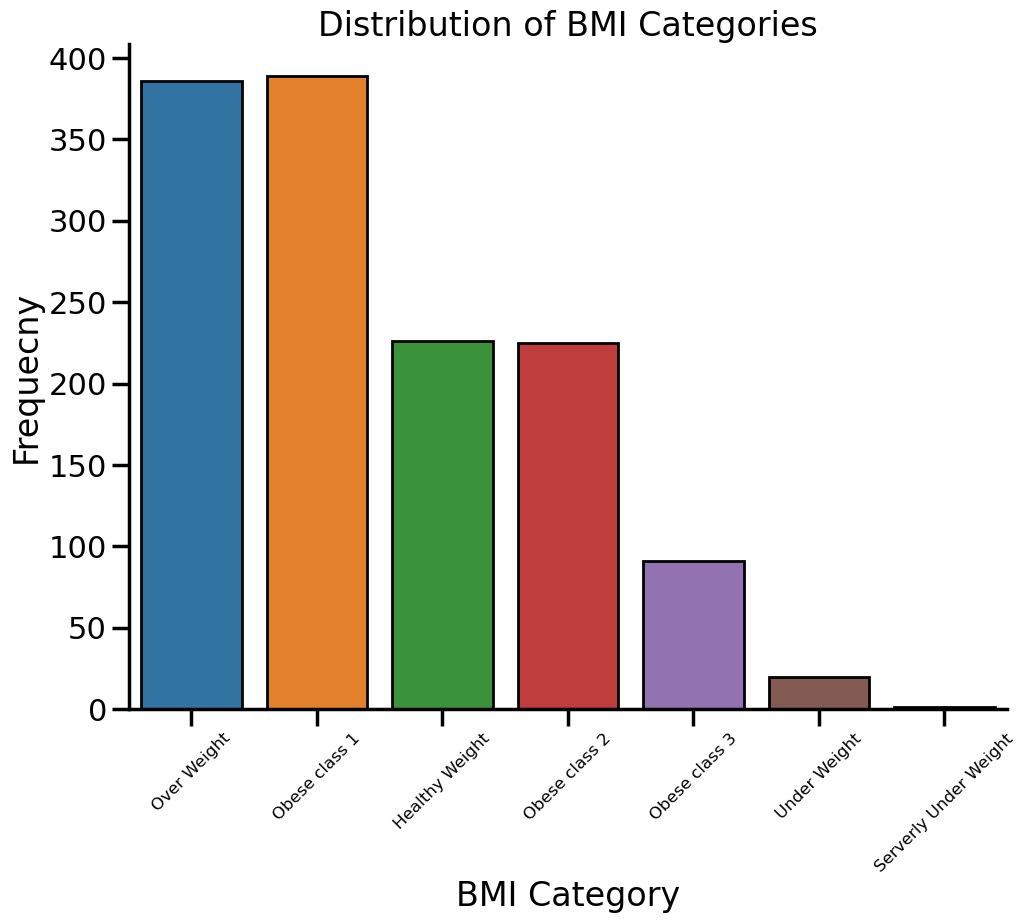

In [65]:
#Bar chart for BMI Category
fig = sns.catplot(x = 'bmi_cat', data = insurance, 
                 kind = 'count', edgecolor = 'black',
                 height=8.27, aspect=11.7/8.27)
# Labels
fig.set(xlabel = 'BMI Category', 
        ylabel = 'Frequecny', 
        title = 'Distribution of BMI Categories')

# Rotating and resizing x labels
plt.xticks(rotation = 45, fontsize = 12)

plt.show()


The largest category is overweight and the lowest categories are underweight, severely underweight and obese class three. This is expected as the extreme BMI ranges are less common.

### b.) Variation of charges

#### i.) Distribution of Data

In [66]:
insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

The median of the charges is \\$9382 and the mean is \\$13270. The minimum amount the insurer was charged was \\$1122 and the maximum was \\$63770.|

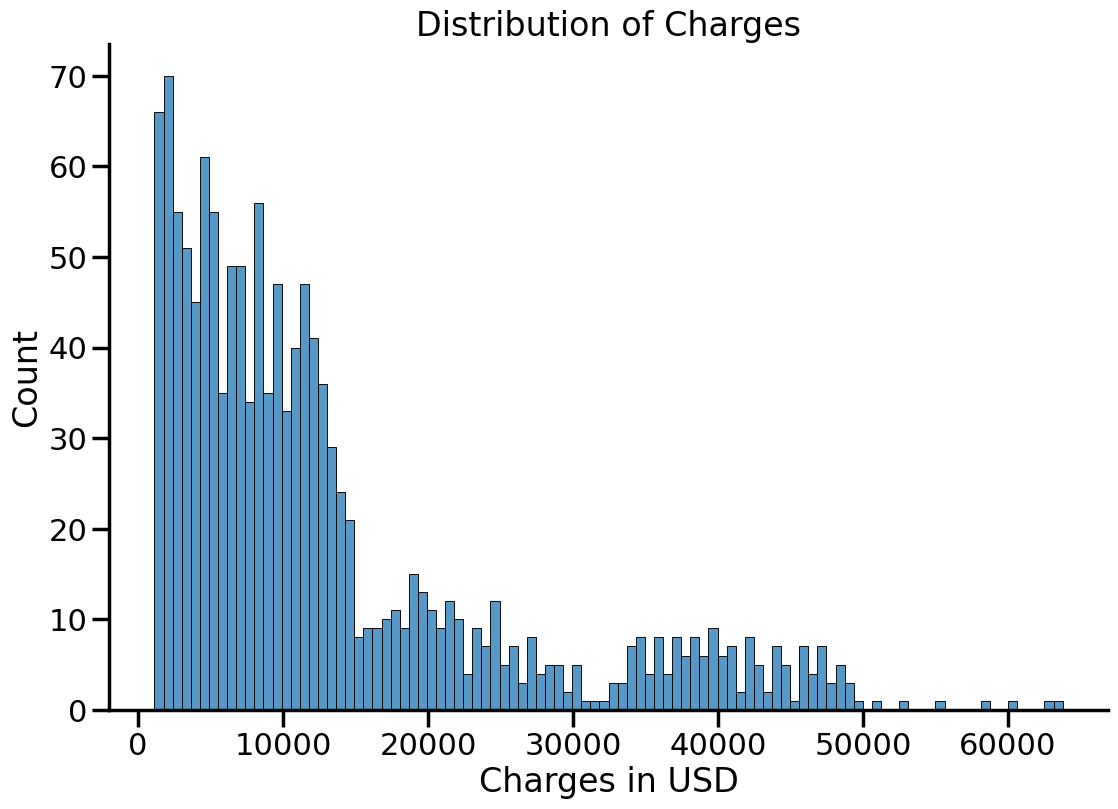

In [70]:
# Histogram of charges
sns.set_context("poster")
fig = sns.displot(x = 'charges',  data = insurance, kind="hist", bins = 100, height=8.27, aspect=11.7/8.27)
fig.set(xlabel = "Charges in USD", title = "Distribution of Charges")
plt.show()

Since the charges data is skewed to the right the median value of \\$9,382 is a better measure of the center. Using the IQR we note 50% of the claims were between \\$4,740 and \\$16,640.

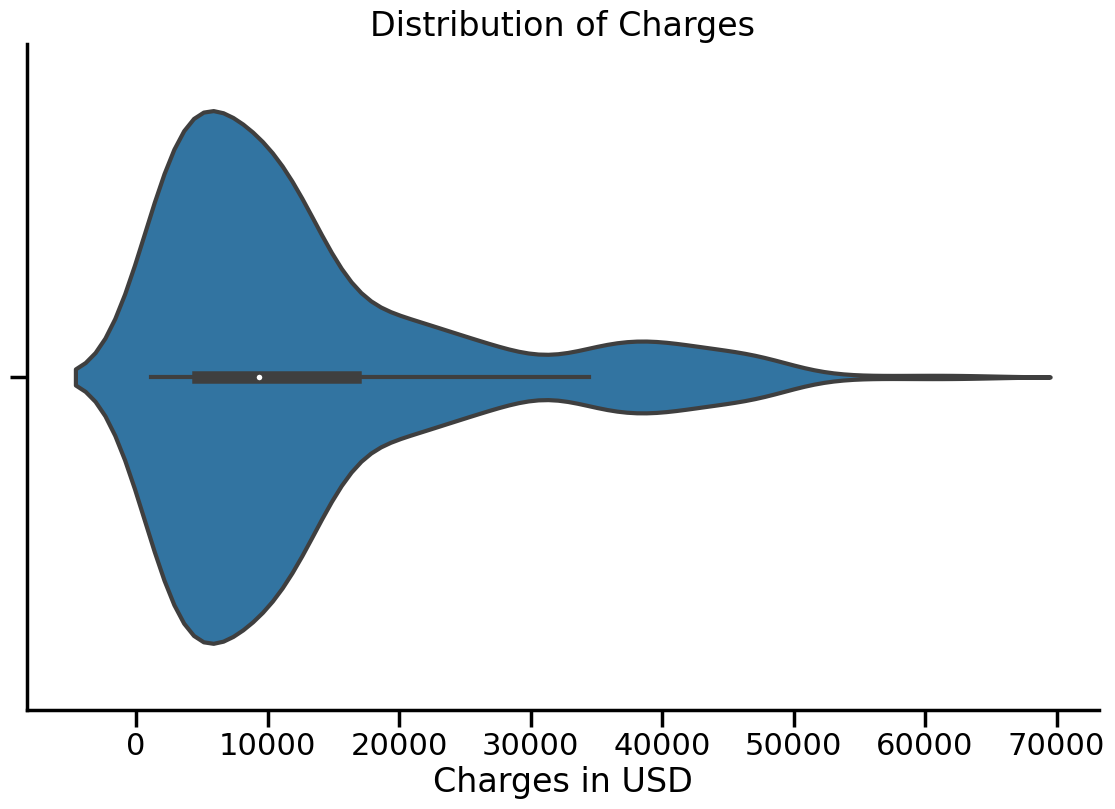

In [72]:
#Violin plot of charges

fig = sns.catplot(x = "charges", data = insurance, kind = "violin", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

fig.set(xlabel = "Charges in USD", title= "Distribution of Charges")

plt.show()

The violin plot shows that there is a higher frequency of charges less than \\$2000. There are several entry's that are very high (greater than \\$6000). These will be investigated to determine whether or not they need to be removed.

#### ii.) Checking for outliers.

In [76]:
insurance.query("charges > 50000").filter(['bmi_cat','smoker','charges'])

,bmi_cat,smoker,charges
34,Obese class 2,yes,51194.55914
543,Obese class 3,yes,63770.42801
577,Obese class 2,yes,58571.07448
819,Obese class 2,yes,55135.40209
1146,Obese class 1,yes,52590.82939
1230,Obese class 1,yes,60021.39897
1300,Obese class 1,yes,62592.87309


The top insurances charges all come from people who smoke and are obese. This information could be useful so the values should not be removed

### c.) Variation of Smokers

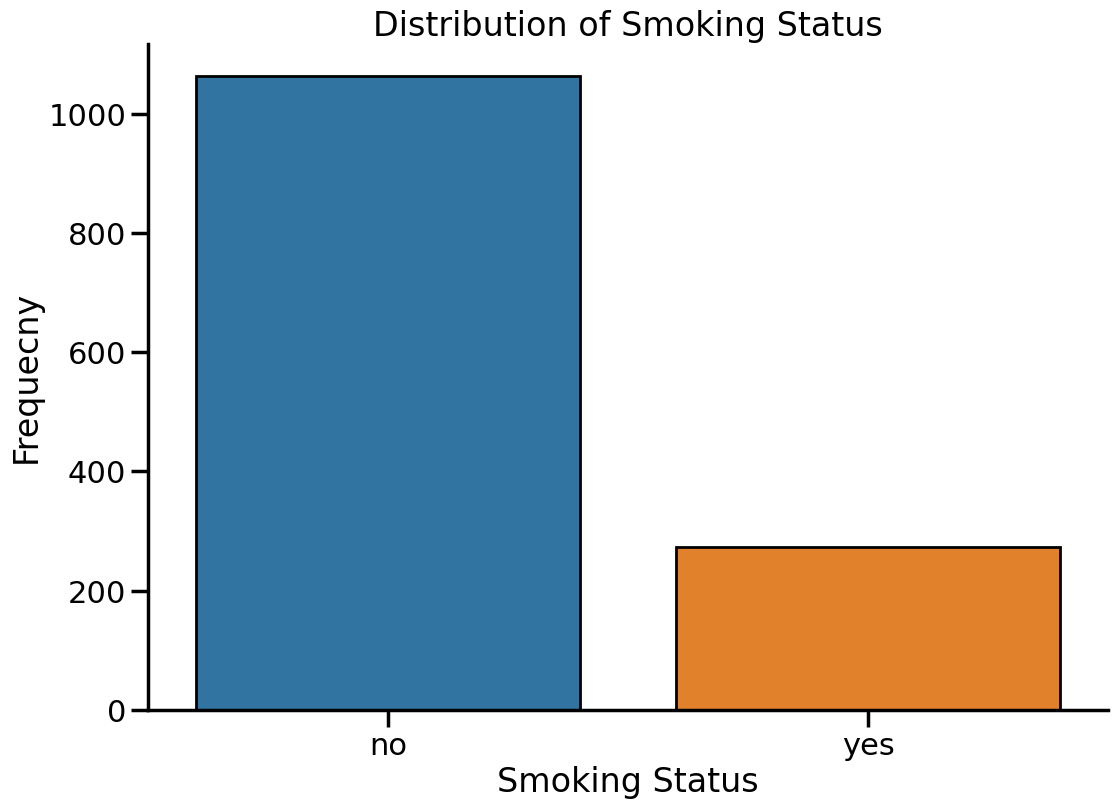

In [79]:
#Bar chart for smoker status
fig = sns.catplot(x = 'smoker', data = insurance, 
                 kind = 'count', edgecolor = 'black',
                 height=8.27, aspect=11.7/8.27)
# Labels
fig.set(xlabel = 'Smoking Status', 
        ylabel = 'Frequecny', 
        title = 'Distribution of Smoking Status')

plt.show()

There are more non-smokers than smokers.

In [81]:
# Frequency Table for Smoking Status
# Frequency of categories

freq_table_smk = insurance.smoker.value_counts().reset_index().\
        rename(columns = {'smoker': 'freq','index': 'smoker'})

freq_table_smk.assign(percentage = 
                      (freq_table_smk.freq/freq_table_smk.freq.sum()*100).round(1).astype(str) + '%')

,smoker,freq,percentage
0,no,1064,79.5%
1,yes,274,20.5%


This data contains 20% smokers and 80% non smokers

### d.) Variation of Regions

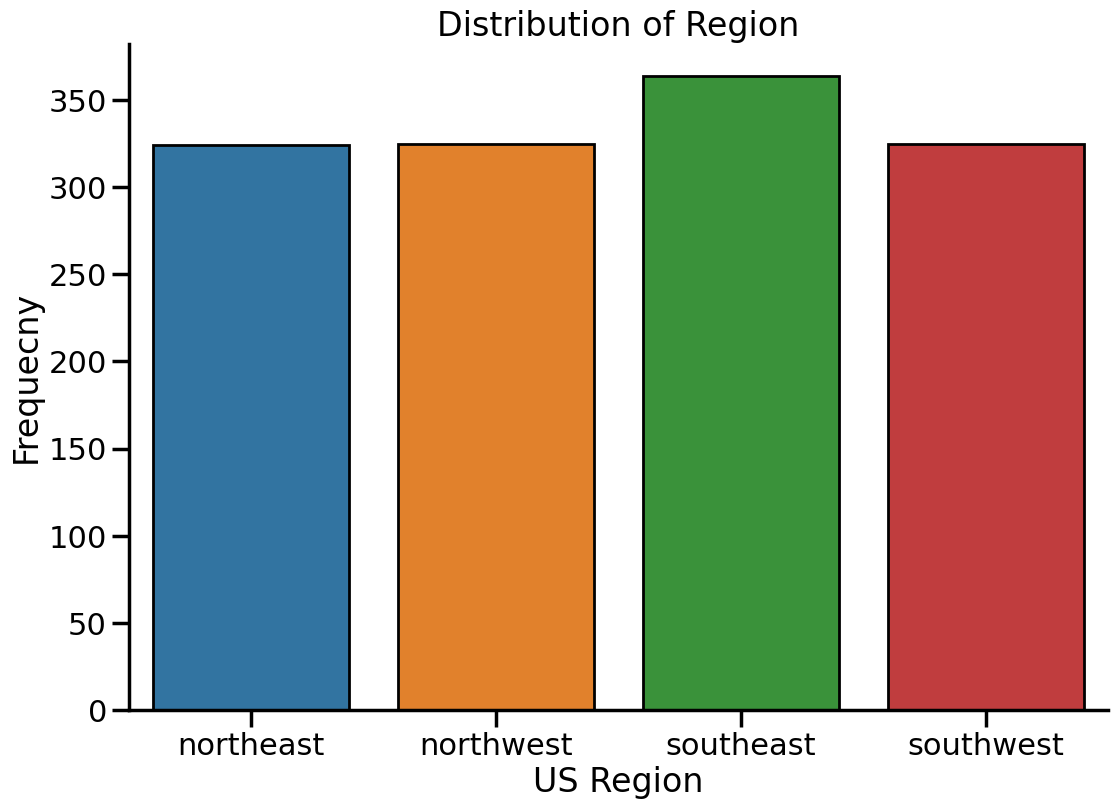

In [83]:
#Bar chart for smoker status
fig = sns.catplot(x = 'region', data = insurance, 
                 kind = 'count', edgecolor = 'black',
                 height=8.27, aspect=11.7/8.27)
# Labels
fig.set(xlabel = 'US Region', 
        ylabel = 'Frequecny', 
        title = 'Distribution of Region')

plt.show()

Individuals appear to be evenly distributed with the southeast having slightly more representation that the other regions.

In [85]:
# Frequency table for regions.

freq_table_reg = insurance.region.value_counts().reset_index().\
        rename(columns = {'region': 'freq','index': 'region'})

freq_table_reg.assign(percentage = 
                      (freq_table_reg.freq/freq_table_reg.freq.sum()*100).round(1).astype(str) + '%')

,region,freq,percentage
0,southeast,364,27.2%
1,northwest,325,24.3%
2,southwest,325,24.3%
3,northeast,324,24.2%


The spread across the regions are pretty even with 24% of individuals residing in the southwest, 27% in the southeast, 24% in the northwest, and 24% in the northeast.

## 2.) Relationships Between Two Variables

### a.) Two Categorical variable relationship

#### i.)Is there a coorilation between a person region and smoker status

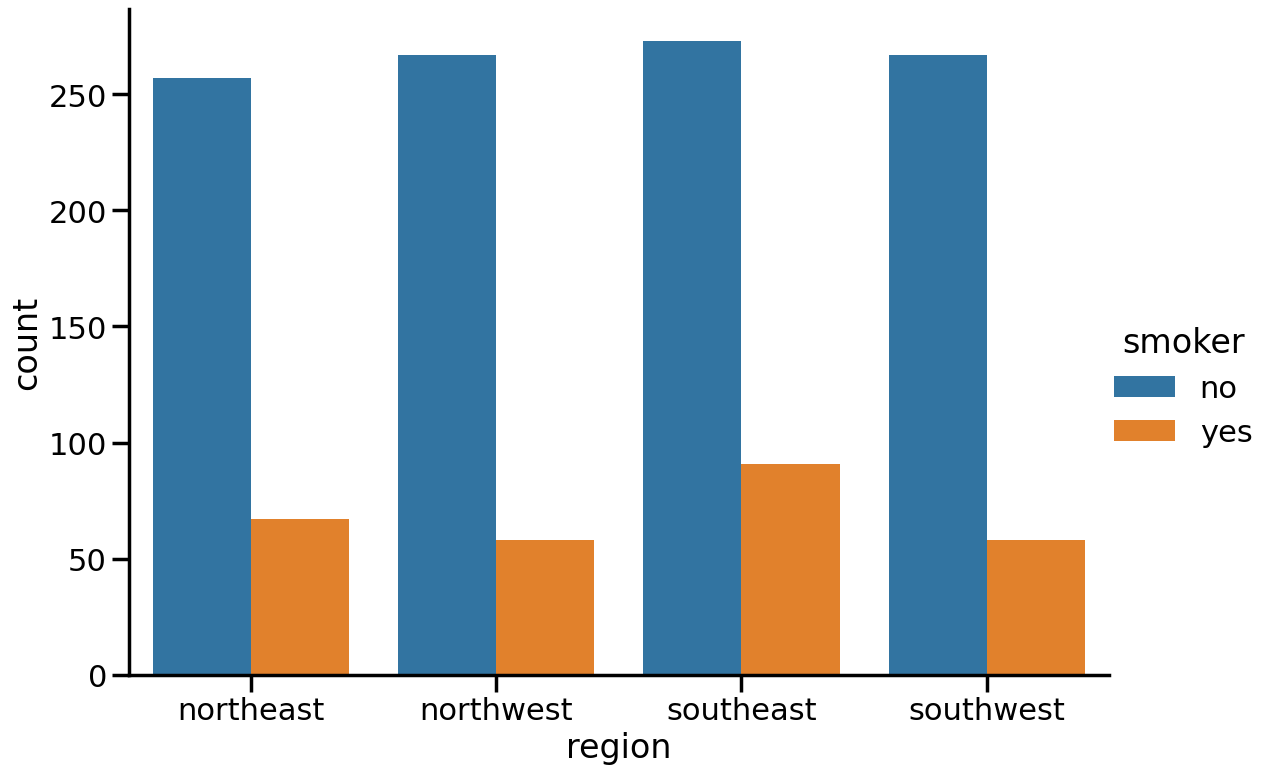

In [92]:
# 
sns.catplot(x="region", hue="smoker", data=insurance, kind = 'count', 
            dodge = True, height=8.27, aspect=11.7/8.27)

plt.show()

The distribution of nonsmokers is pretty even across the regions, however the it appears the southeast has 

In [94]:
# Subset of smokers
df = insurance.query("smoker == 'yes'")
 
#Frequency table of smokers in each region
freq_table_sreg = df.region.value_counts().reset_index().\
        rename(columns = {'region': 'freq','index': 'region'})

freq_table_sreg.assign(percentage = 
                      (freq_table_sreg.freq/freq_table_sreg.freq.sum()*100).round(1).astype(str) + '%')

,region,freq,percentage
0,southeast,91,33.2%
1,northeast,67,24.5%
2,northwest,58,21.2%
3,southwest,58,21.2%


33% of the smokers reside in the southeast, 25% in the north east, and the northwest and southwest each contain 21% of the smokers.

In [127]:
# What proportion of each region smokes?
insurance.assign(smoker_perc = (insurance.smoker  == 'yes')).\
groupby(['region']).\
agg({'smoker_perc': lambda x: (x.sum()/x.shape[0] * 100).round(1).astype(str) + '%'}).reset_index()

,region,smoker_perc
0,northeast,20.7%
1,northwest,17.8%
2,southeast,25.0%
3,southwest,17.8%


25% of the individuals from the southeast,21% of the individuals from the northeast, and 18% of the individuals from the southwest and northwest are smokers.
#### ii.) Does one unhealthy habit lead to others? 
Do the regions with more smokers also have more overweight people?

In [133]:
df_1 = insurance.groupby(['region','bmi_cat']).agg({'bmi':'count'}).\
reset_index().\
rename(columns = {'bmi': 'freq'}).sort_values('bmi_cat').reset_index(drop = True)

joint_prob_insurance = df_1.assign(joint_pct = (df_1.freq/df_1.freq.sum()*100).round(1))


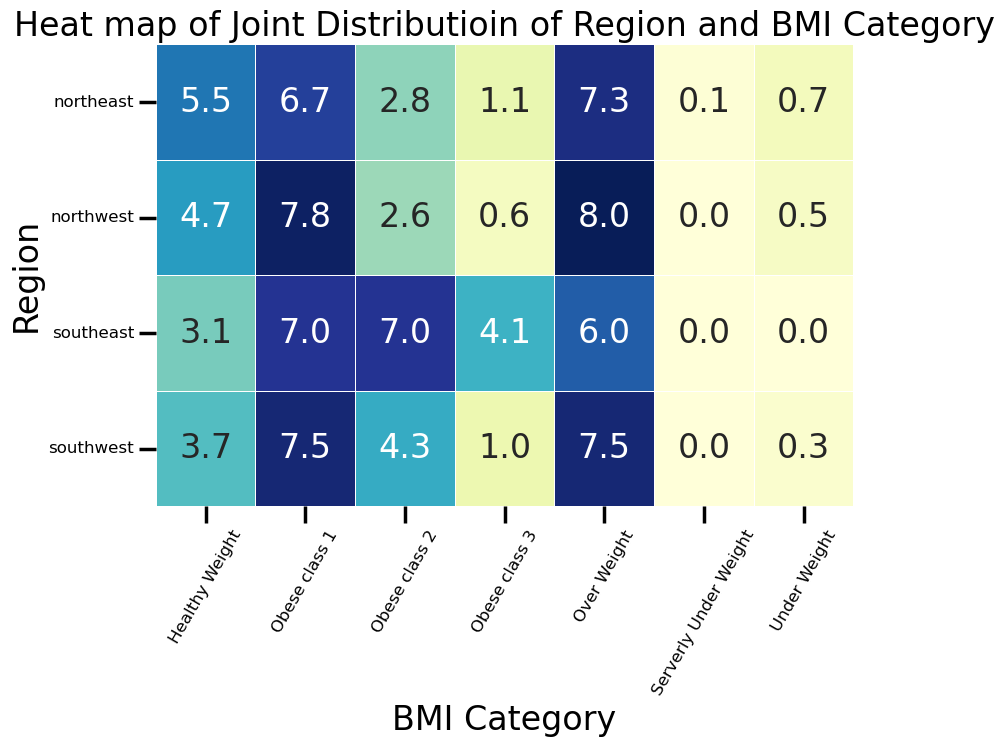

In [160]:
joint_prob_insurance_wide = joint_prob_insurance.pivot("region", "bmi_cat", "joint_pct")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(joint_prob_insurance_wide,cmap = 'YlGnBu',
            annot=True, fmt=".1f", linewidths=.5, ax=ax, cbar =False)
ax.set(xlabel = 'BMI Category', 
       ylabel = 'Region', 
       title= "Heat map of Joint Distributioin of Region and BMI Category")

# Rotating and resizing x labels
plt.xticks(rotation = 60, fontsize = 12)
plt.yticks(fontsize = 12)


plt.show()

The southeast has a substantially greater percentage of individuals classified as Obese class 2 and class 3 and the lowest percentage of individuals classified as healthy weight. The northeast has the highest percentage of individuals classified as underweight and severely underweight.

In [166]:
insurance.assign(not_healthy_perc = (insurance.bmi_cat  != 'Healthy Weight')).\
groupby(['region']).\
agg({'not_healthy_perc': lambda x: (x.sum()/x.shape[0] * 100).round(1).astype(str) + '%'}).reset_index()

,region,not_healthy_perc
0,northeast,77.5%
1,northwest,80.6%
2,southeast,88.7%
3,southwest,84.9%


From the table we see that the most unhealthy group is the southeast, which also had the highest percent of smokers. How ever the northeast has the least percentage of unhealthy people and had the second highest percent of smokers.

Looking at health as either healthy or not healthy does not take into account levels of health. For example it is better to be overweight than class 3 obese or severely underweight. We will look at the relationship between region and BMI in the next section

### b.) Catagorical vs Continuous

#### i.) Relationship between region and BMI

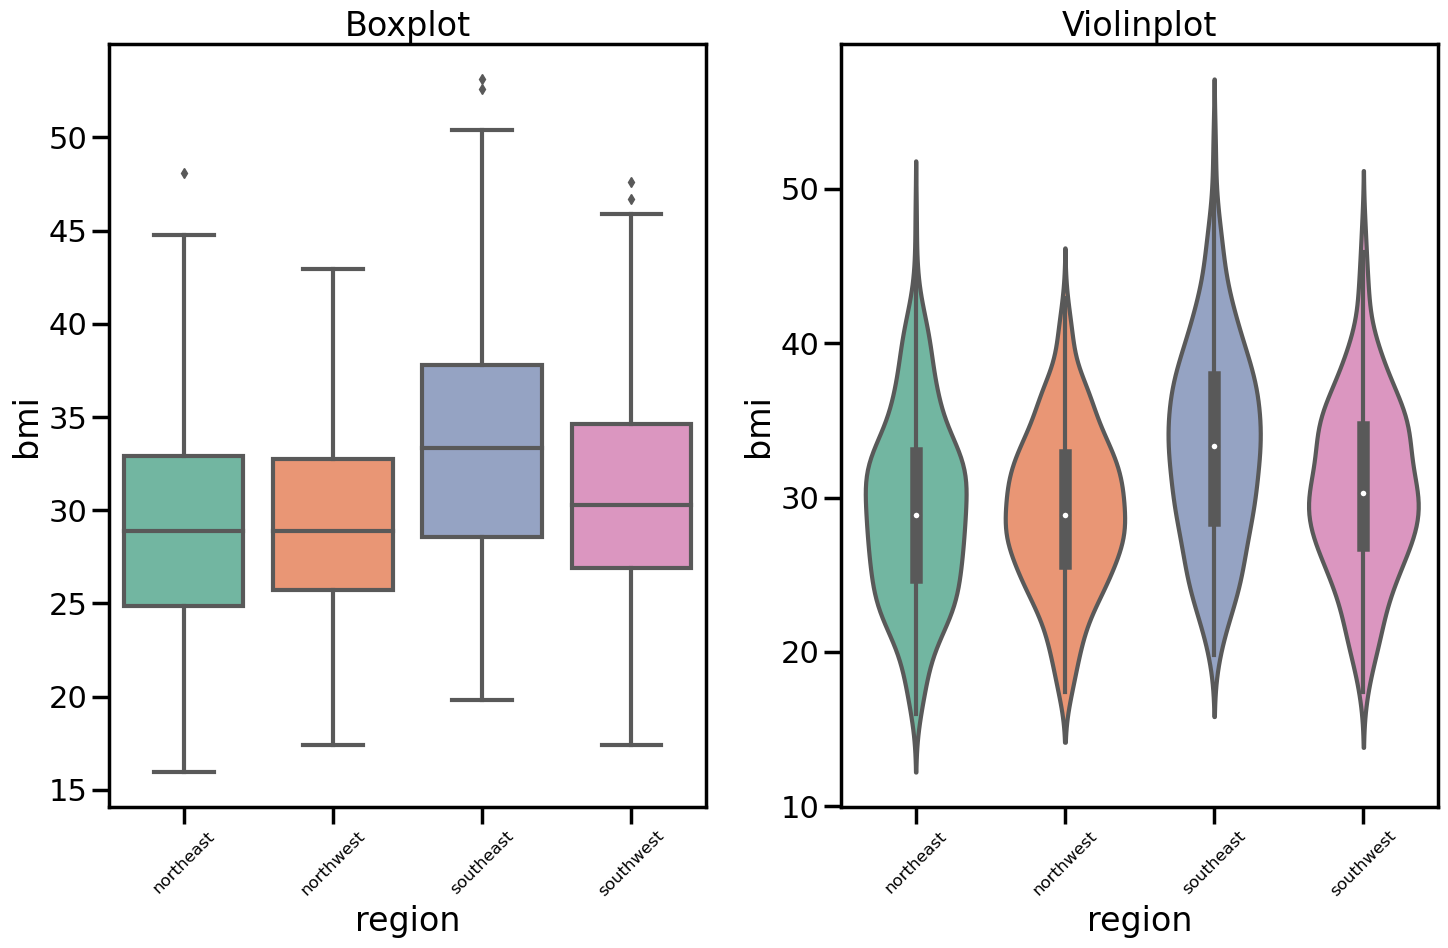

In [170]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
g = sns.boxplot(x = 'region', y='bmi', data = insurance, palette="Set2", ax = ax1)
ax1.set_title("Boxplot")

plt.xticks(rotation =45, fontsize = 12)

ax2 = fig.add_subplot(122)
g = sns.violinplot(x = 'region', y='bmi', data = insurance, palette="Set2", ax = ax2)
ax2.set_title("Violinplot")

plt.xticks(rotation =45, fontsize = 12)
fig.set_figheight(10)
fig.set_figwidth(15)

plt.close(2)
plt.close(3)

plt.tight_layout()

Since the southeast's plotx are shifted further up, the southeast states have a higher average BMI than the other states.

In [172]:
# Summary Table
insurance.groupby('region').agg({'bmi':['mean', 'median', 'std']}).round(2)

bmi             
            mean median   std
region                       
northeast  29.17  28.88  5.94
northwest  29.20  28.88  5.14
southeast  33.36  33.33  6.48
southwest  30.60  30.30  5.69

The southern regions tend to have a higher average BMI than those in the north. With the highest average BMI of 33.4 belonging to the southeast states.

#### ii.) Is there a correlation between healthy weight and region.

Looking only at average BMI is not a good way to determine healthy weights. This because an individual with a really low BMI is also unhealthy. These low values would skew the average BMI to the left. To counter act this a new variable `risk_factor` will be created to penalize the underweight BMI. A higher number for this variable signifies they are more unhealthy in terms of weight. The variable, `risk_factor`, was created by calculating how far a individual BMI was from the health weight range. Through research, I found that being underweight can be just as harmful as being obese. The plot with mortality risk vs BMI followed a J shaped curve. A person with a BMI of around 17 should have the same risk factor as in the mid to high 30's. To compensate for this I multiplied the difference for the those underweight by 10. This seemed to fit the research I was looking at. ([https://www.thelancet.com/journals/landia/article/PIIS2213-8587(18)30288-2/fulltext#seccestitle140](https://www.thelancet.com/journals/landia/article/PIIS2213-8587(18)30288-2/fulltext#seccestitle140){.uri})

(*My model was created by just selecting certain values of low BMI's and matching them on the graph to the high BMI's with the same risk factors. I then tried different multipliers to get close. I settled with 10. A more rigorous approach can be taken to get a better model.*)

In [179]:
def func(bmi):
    if  bmi<18.5:
        risk_factor = (18.5 - bmi)*10
    elif bmi>=18.5 and bmi <= 25:
        risk_factor = 0
    elif bmi>25:
        risk_factor = bmi - 25
    return risk_factor

insurance['risk_factor']= insurance.apply(lambda x: func(x['bmi']), axis=1)


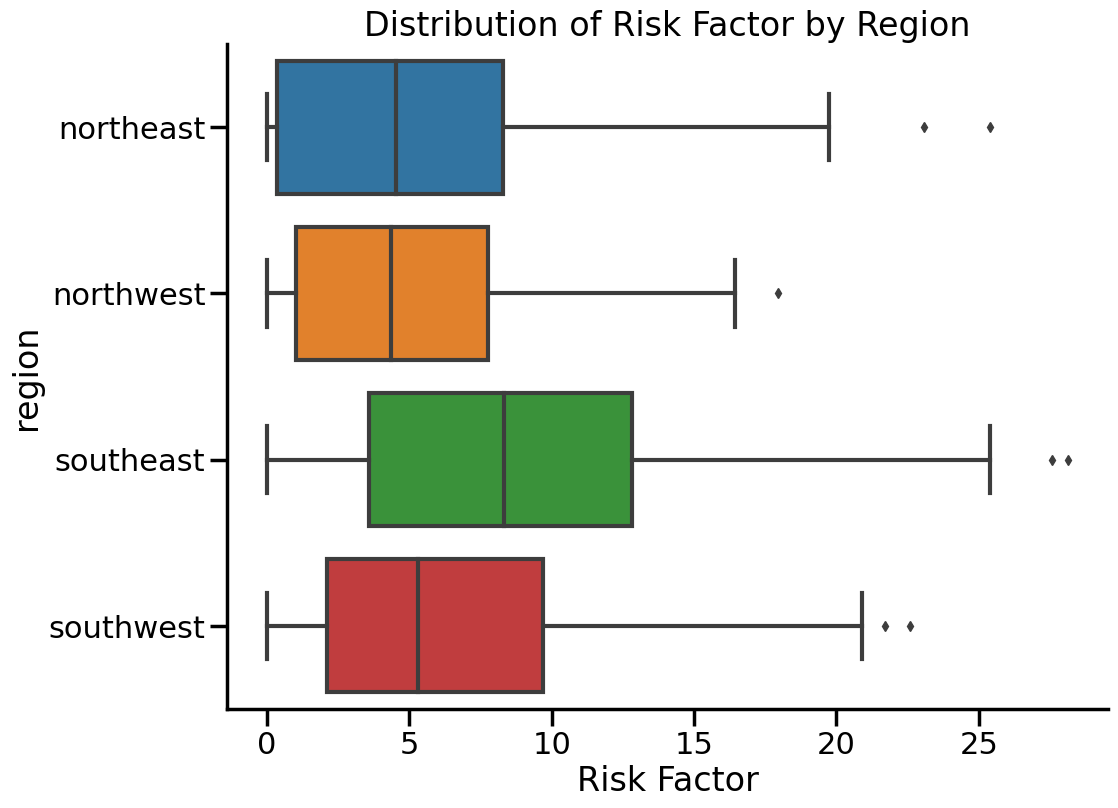

In [187]:
#Boxplot of risk_factor by region

fig = sns.catplot(x = "risk_factor", y= 'region', data = insurance, kind = "box", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

fig.set(xlabel = "Risk Factor", title= "Distribution of Risk Factor by Region")

plt.show()

The southeast is still shifted to the right making it the region with the highest risk. 

In [184]:
# Summary Table
insurance.groupby('region').agg({'risk_factor':['mean', 'median', 'std']}).round(2)

risk_factor             
                 mean median   std
region                            
northeast        5.34   4.54  5.11
northwest        4.95   4.36  4.25
southeast        8.57   8.33  6.13
southwest        6.13   5.30  4.97

The medians for northeast and southeast differ by about 2.


The southeast has a highest median risk factor, meaning it on average it is the most unhealthy in terms of weight. This makes the region the have the most smokers and most unhealthy weight. From this I have two questions: Is smoking related to healthy weights? And does the southeast have more insurance charges?

#### iii.) What is the relationship between smoking and risk factor.

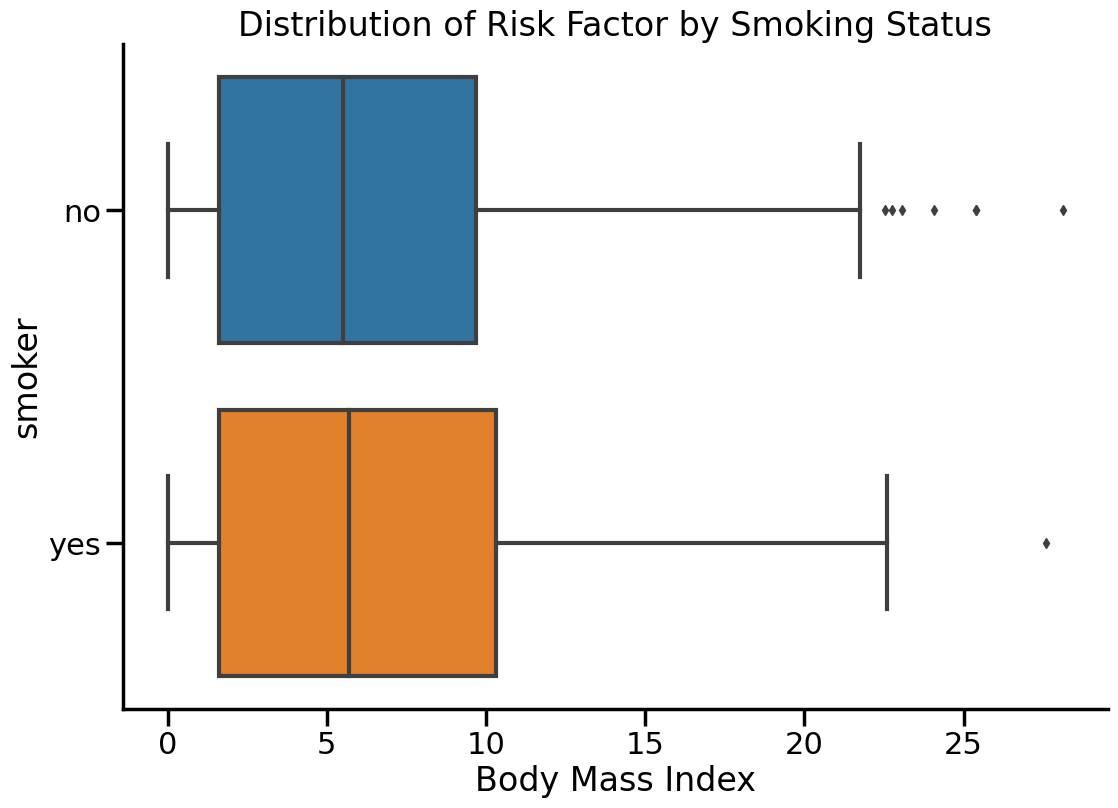

In [189]:
fig = sns.catplot(x = "risk_factor", y= 'smoker', data = insurance, kind = "box", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

fig.set(xlabel = "Body Mass Index", title= "Distribution of Risk Factor by Smoking Status")

plt.show()

It appears that the there is no correlation between smoking and risk factors based of BMI.

In [191]:
# Summary Table
insurance.groupby('smoker').agg({'risk_factor':['mean', 'median', 'std']}).round(2)

risk_factor             
              mean median   std
smoker                         
no            6.29   5.50  5.35
yes           6.40   5.68  5.53

The averages and standard deviation of risk factor for smokers and non smokers are about the same suggesting there is not a correlation between a healthy weight and whether or not a person smokes.

#### iv.) What is the relationship between region and charges

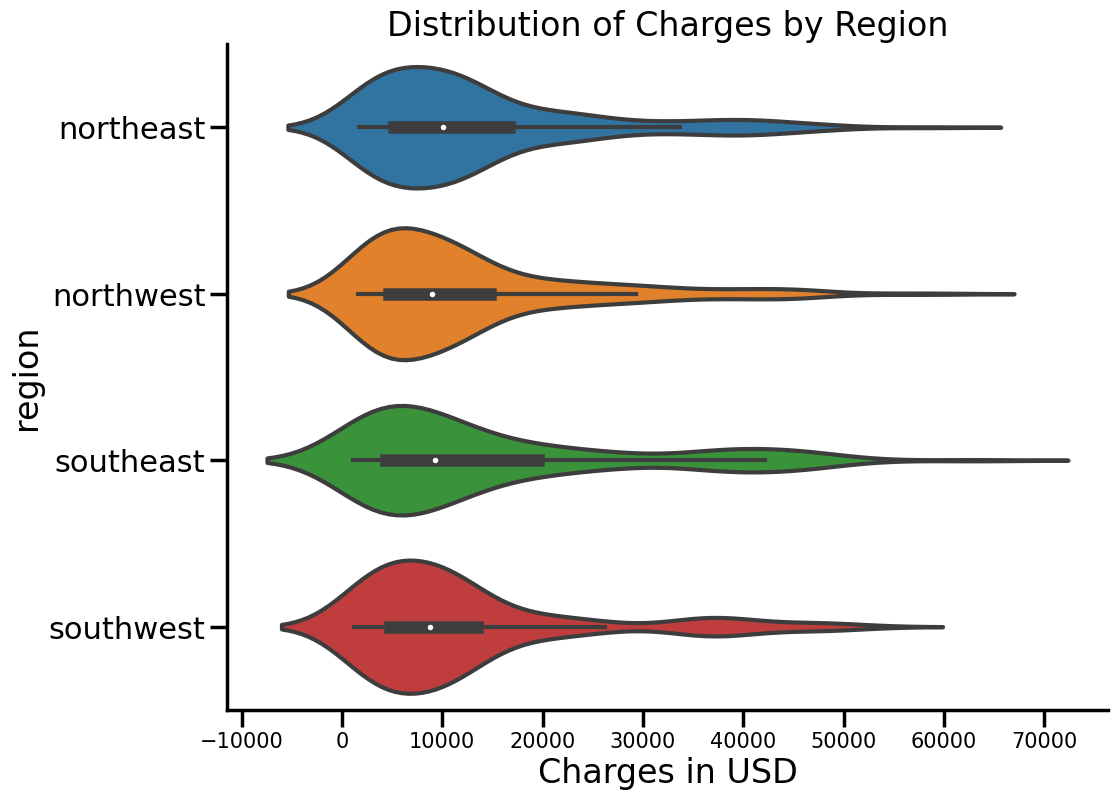

In [195]:
fig = sns.catplot(x = "charges", y= 'region', data = insurance, kind = "violin", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

fig.set(xlabel = "Charges in USD", title= "Distribution of Charges by Region")

plt.xticks( fontsize = 15)

plt.show()

I expected to see the southeast to have higher insurance charges due to the fact that they had higher percentage of smokers and median higher risk factor. I do not see an obvious correlation between region and insurance charges. The northeast and southeast both have highest values of charges, but very different risk factors. Because these two region had the highest percent of smokers I hypothesize that smoking status may have a greater impact on insurance charges than risk factors based on BMI.


In [197]:
# Summary Table
insurance.groupby('region').agg({'charges':['mean', 'median', 'std']}).round(2)

charges                    
               mean    median       std
region                                 
northeast  13406.38  10057.65  11255.80
northwest  12417.58   8965.80  11072.28
southeast  14735.41   9294.13  13971.10
southwest  12346.94   8798.59  11557.18

The southeast has a higher average charges, while the northeast has the highest medain charges.
#### ii.) What is the relationship between Smoking and Charges

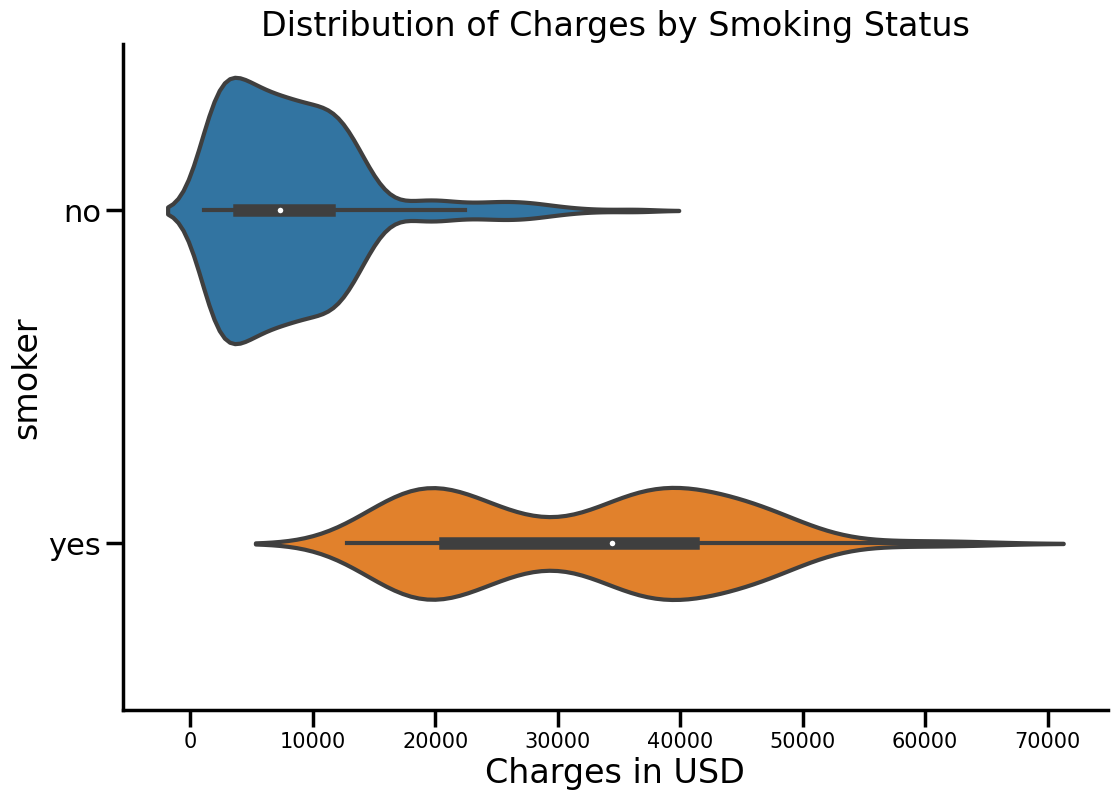

In [199]:
fig = sns.catplot(x = "charges", y= 'smoker', data = insurance, kind = "violin", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

fig.set(xlabel = "Charges in USD", title= "Distribution of Charges by Smoking Status")

plt.xticks( fontsize = 15)

plt.show()

Since the smoker's graph is further to the right, it appears that smoking increases your chance of having higher insurance claims.


In [201]:
# Summary Table
insurance.groupby('smoker').agg({'charges':['mean', 'median', 'std']}).round(2)

charges                    
            mean    median       std
smoker                              
no       8434.27   7345.41   5993.78
yes     32050.23  34456.35  11541.55

Looking at the mean charges based on smoking status we see that smokers have an average charge \$23615.96 more than non_smokers.


### c.) Two Continuous

#### i.) What is the relationship between BMI and Charges

I would hypothesize that there would be a positive correlation between BMI and Charges, meaning the higher your BMI the more charges you would have.

In [204]:
rho = np.corrcoef(insurance.charges, insurance.bmi)

rho.round(2)

array([[1. , 0.2],
       [0.2, 1. ]])


Having a correlation coefficient of .2 suggests the two variables are not very correlated. This is surprising.

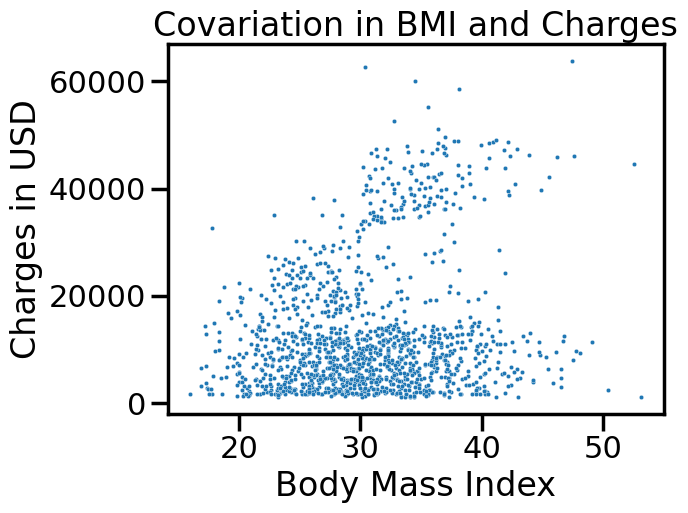

In [212]:
g= sns.scatterplot(x = "bmi", y = 'charges', s = 10, data = insurance)
g.set(xlabel = "Body Mass Index",
      ylabel = "Charges in USD",
      title = "Covariation in BMI and Charges")

plt.show()

It appears that there is a positive correlation between an individuals BMI and the amount charges. However there appears to be two clusters that might be occurring in this data.


### d.) Two continous and a categorical

#### i.) What is the correlation between BMI, Charges, and Smoking Status.


In [214]:
df = insurance.query("smoker == 'yes'")
                     
rho = np.corrcoef(df.charges, df.bmi)

rho.round(2)

array([[1.  , 0.81],
       [0.81, 1.  ]])

When looking at the subset of individuals that smoke, we see a strong correlation between insurance charges and BMI. Meaning if you smoke, the more your BMI effects your insurance charges.

In [216]:
df = insurance.query("smoker == 'no'")
                     
rho = np.corrcoef(df.charges, df.bmi)

rho.round(2)

array([[1.  , 0.08],
       [0.08, 1.  ]])

When looking at the subset of individuals that do not smoke, we see that there is a low correlation between BMI and Insurance charges.

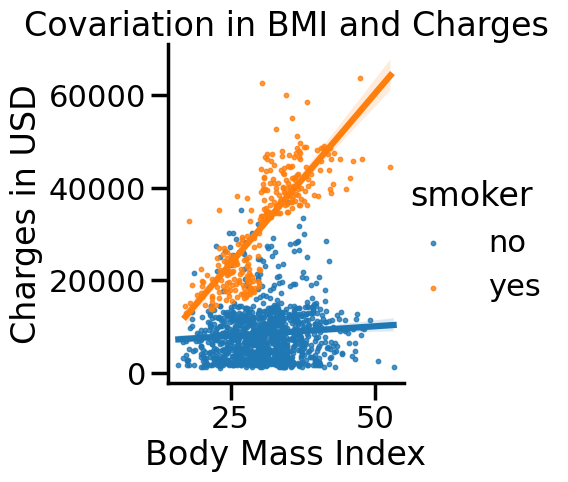

In [226]:
g= sns.lmplot(x = "bmi", y = 'charges', hue = 'smoker',scatter_kws={"s": 10}, data = insurance)
g.set(xlabel = "Body Mass Index",
      ylabel = "Charges in USD",
      title = "Covariation in BMI and Charges")

plt.show()

It appears that if you are a nonsmoker then your BMI does not greatly impact you charges, but if you do smoke, then the higher your BMI you can expect higher charges.